In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Text(0,0.5,'Count')

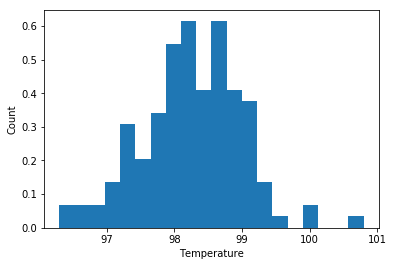

In [7]:
#EDA using histogram

_ = plt.hist(df['temperature'], bins=20, normed=True)
plt.xlabel('Temperature')
plt.ylabel('Count')

In [8]:
#Compute mean and std of the temperatures (real data)

m = np.mean(df['temperature'])
sd = np.std(df['temperature'])

In [9]:
print("Mean : ", m)
print("SD : ", sd)

Mean :  98.24923076923078
SD :  0.7303577789050377


#### Write functions for computing the ECDFs and the bootstrap replicates

In [10]:
#ECDFs (Empirical Cumulative Distribution Function) of human temperatures

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [11]:
def draw_bs_replicates(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

## 1. Is the distribution of body temperatures normal?

#### Normal Distribution

In [12]:
# Take 10000 samples out of the normal distribution with the computed mean and std

samp_normal = np.random.normal(m, sd, size=10000)

In [13]:
# CDF of the samples
x_normal, y_normal = ecdf(samp_normal)

In [14]:
#CDF of the real data
x, y = ecdf(df['temperature'])

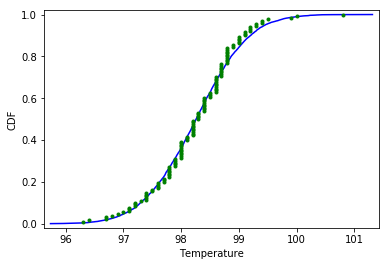

In [15]:
# Plot both the CDFs 

_ = plt.plot(x_normal, y_normal, color='blue')
_ = plt.plot(x, y, linestyle='none', marker='.', color='green')

plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.margins(0.02)

#### Observation: The normal CDF and the ECDF of the data overlap, suggestting that they are normally distributed

## 2. Is the sample size large? Are the observations independent? 

#### Sample size of 130 cars is given. Observations are independent due to population of all humans greater than 10 times 130.

## 3. Is the true population mean really 98.6 degrees F? 
#### Would you use a one-sample or two-sample test? Why? 
#### In this situation, is it appropriate to use the t or z statistic? 
#### Now try using the other test. How is the result be different? Why? 


In [16]:
### Using the one sample test, as we are comparing one set of sample data to a single number 98.6

In [17]:
### Null Hypothesis: The true population mean temperature is actually 98.6 deg F
### H0 : Mu = 98.6

### Since we are comparing a dataset to a value (98.6), permutation test is not applicable. 
### We need to shift the data such that the mean is 98.6

In [18]:
temp_shifted = df['temperature'] - np.mean(df['temperature']) + 98.6

In [19]:
def diff_from_newmean(data, newmean=98.6):
    return np.mean(data) - newmean

In [20]:
diff_obs = diff_from_newmean(df['temperature'])

In [21]:
diff_obs

-0.35076923076921673

In [22]:
bs_replicates = draw_bs_replicates(temp_shifted, diff_from_newmean, 10000)

In [23]:
p_value = np.sum(bs_replicates <= diff_obs)/ 10000 ### mean of real data is less than 98.6, hence < is used

In [24]:
p_value

0.0

In [25]:
#### Observation: Since p-value is 0, Null hypothesis is false

In [26]:
### z test is done when the given population std deviation is known.
### t test is done when we only have the sample std. deviation.

#### z = (estimate - Mu) / SD of estimate

#### t = (estimate - Mu) / Std. error of the mean,
#### where std. error of the mean = np.std(data) / np.sqrt(len(data))

#### Since we do not know the SD of the population, we should be doing the t test



In [27]:
#bs_reps = draw_bs_replicates(df['temperature'], np.mean, 10000)

In [28]:
#bs_std = np.std(bs_reps)

In [29]:
#bs_std

In [30]:
sem = np.std(df['temperature'])/np.sqrt(len(df))

In [31]:
sem

0.064056614695193359

In [32]:
#_ = plt.hist(bs_reps, bins=20, normed=True)
#plt.xlabel('Mean Temperature')
#plt.ylabel('PDF')

In [33]:
#### Observation: The SD of the bootstrap replicates bs_std and the SEM sem are the same.

In [34]:
t = (np.mean(df['temperature']) - 98.6)/sem

In [35]:
t

-5.4759252020781162

In [36]:
z = (np.mean(df['temperature']) - 98.6)/np.std(df['temperature'])

In [37]:
z

-0.48027041116080765

In [38]:
### How to get the respective p-value from the above t and z scores ?

In [39]:
#### Need help to do #4

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [40]:
np.mean(np.random.choice(df['temperature'], len(df)))

98.138461538461542

In [41]:
bs_rep = np.empty(10000)
for i in range(10000):
    bs_rep[i] = np.mean(np.random.choice(df['temperature'], len(df)))
print(bs_rep)

[ 98.34153846  98.19153846  98.26615385 ...,  98.30076923  98.18923077
  98.18615385]


In [43]:
### Calculate the 95% CI
ci_95 = np.percentile(bs_rep, [2.5, 97.5])

In [44]:
ci_95

array([ 98.12384615,  98.37692308])

In [45]:
#ME = ConfCoefft * (sd/sqrt(n)), where for 95% CI, ConfCoefft = 1.96

In [46]:
ME = 1.96 * (np.std(df['temperature'])/np.sqrt(len(df)))

In [47]:
ME

0.12555096480257899

In [48]:
m - ME #lower bound of CI_95

98.123679804428193

In [50]:
m + ME #upper bound of CI_95

98.374781734033363

#### We are 95% confident that the normal temperature is between 98.12 and 98.37.
#### Temperature less than 98.12 or > 98.37 is abnormal

## 6. Is there a significant difference between males and females in normal temperature? 

In [51]:
#### We will test the hypothesis that there is no difference in normal temperature between males and females

In [52]:
male_temp = df[df['gender']=='M'][['temperature']]

In [53]:
female_temp = df[df['gender']=='F'][['temperature']]

In [54]:
temps_concat = np.concatenate((male_temp, female_temp))

In [55]:
mean_temp = np.mean(temps_concat)

In [56]:
mean_temp

98.249230769230763

In [57]:
temp_male_shifted = male_temp - np.mean(male_temp) + mean_temp

In [58]:
temp_female_shifted = female_temp - np.mean(female_temp) + mean_temp

In [59]:
bs_replicates_male = draw_bs_replicates(temp_male_shifted['temperature'], np.mean, size=10000)
bs_replicates_female = draw_bs_replicates(temp_female_shifted['temperature'], np.mean, size=10000)

In [60]:
diff_reps = bs_replicates_male - bs_replicates_female

In [61]:
emp_means = np.mean(male_temp['temperature']) - np.mean(female_temp['temperature'])

In [62]:
p = np.sum(diff_reps >= emp_means ) / len(diff_reps)

In [63]:
p

0.98899999999999999

In [64]:
#### p-value is large

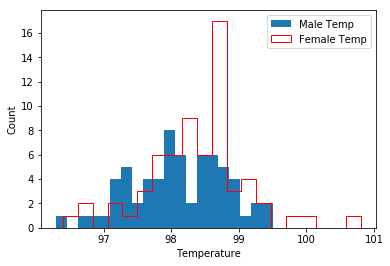

In [65]:
_ = plt.hist(male_temp['temperature'], bins=20, label='Male Temp')
_ = plt.hist(female_temp['temperature'], bins=20,color='red',histtype='step',label='Female Temp')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()